# problem statement

every year companies spent money and resources on hiring,training and development of new as well as existing employees. 

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# importing necessary libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy.stats import zscore


In [6]:
df=pd.read_csv("HR attrition rate.csv")

In [3]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
df.shape

(1470, 35)

in the dataset, there are 1470 rows and 35 columns 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

in the dataset, there are no null values and the data types of the columns are a mixture of int 64, object type

from the dataset, it is identified that the Attrition column is the target or the output variable and the rest are independent features or variables. 
target variable: Attrition

## information about the column

In [7]:
for i in df.columns:
    print(df[i].value_counts())

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
No     1233
Yes     237
Name: Attrition, dtype: int64
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     2

it can be seen that majority of the columns have discrete values and some are continous

# visualisation

<AxesSubplot:xlabel='Attrition', ylabel='count'>

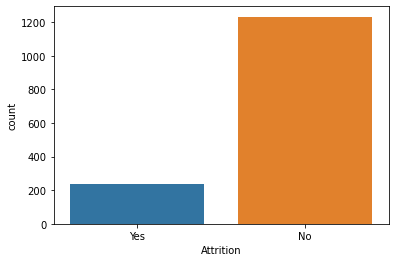

In [14]:
sns.countplot(df["Attrition"])

observation: it can be seen that the attrition rate is less for Yes as compared to NO in IBM.
            
            YES: the count is close to 200
              
            NO: the count is close to 1200

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

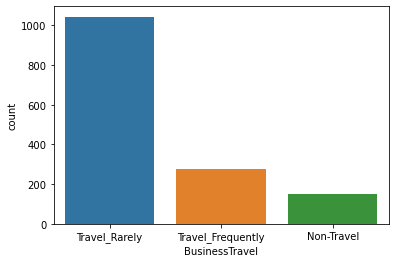

In [19]:
sns.countplot(df["BusinessTravel"])

majority of the employees in IBM travel rarely
the count for employees travelling frequently and non travel is relatively low

<AxesSubplot:xlabel='Department', ylabel='count'>

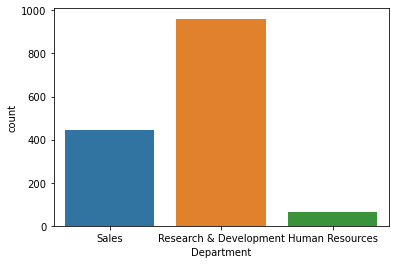

In [50]:
sns.countplot(df["Department"])

IBM is more focussed on collection of data for the employees in the research and development department

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

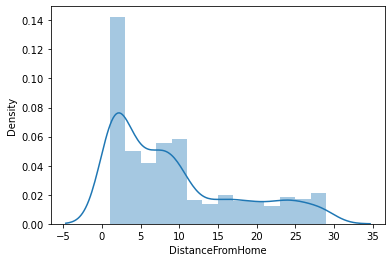

In [52]:
sns.distplot(df["DistanceFromHome"])

in IBM, majority of the employees stay at a distnace of 2 to 10 units, the number of ones staying at a distance of 11 to 28 units is lesser

<AxesSubplot:xlabel='Education', ylabel='count'>

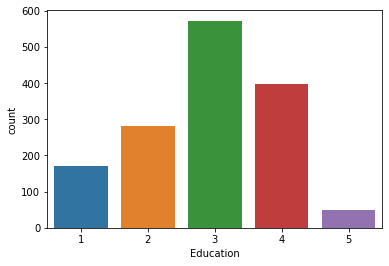

In [22]:
sns.countplot(df["Education"])

majority of the employees belong to education level 3
while the least have education level 5
thus, it can be concluded that in IBM majority of  employees have education level between 3 and 4 

<AxesSubplot:xlabel='EducationField', ylabel='count'>

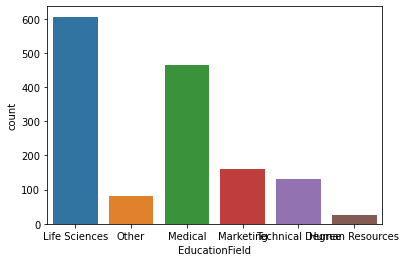

In [23]:
sns.countplot(df["EducationField"])

in IBM, most of the employee been hired are from the educational background of life sciences and medical and the least are from human resources. 

<AxesSubplot:xlabel='EmployeeCount', ylabel='count'>

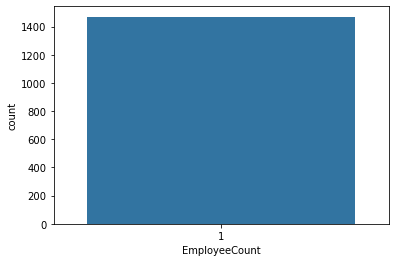

In [54]:
sns.countplot(df["EmployeeCount"])

this column can be dropped 

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

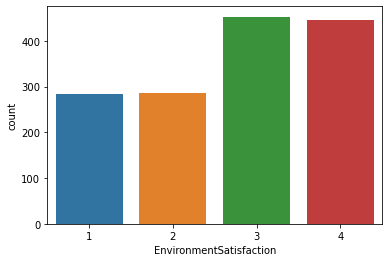

In [25]:
sns.countplot(df["EnvironmentSatisfaction"])

in IBM, more than 400 employees have environment satisfaction level 4, 400 have level 3 and less than 300 have satisfaction levels 1 and 2 

<AxesSubplot:xlabel='Gender', ylabel='count'>

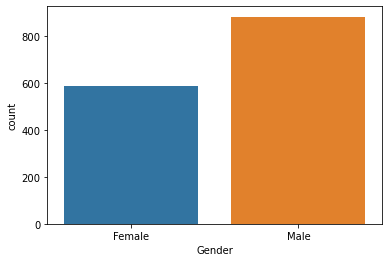

In [26]:
sns.countplot(df["Gender"])

majority of the employees in IBM are male as compared to female

<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

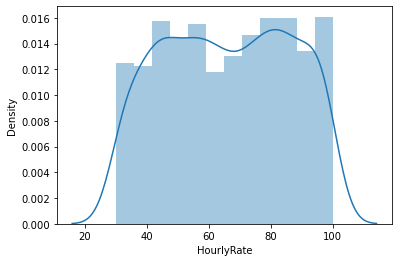

In [55]:
sns.distplot(df["HourlyRate"])

the hourly rate of the employees in IBM ranges between 30 and 100

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

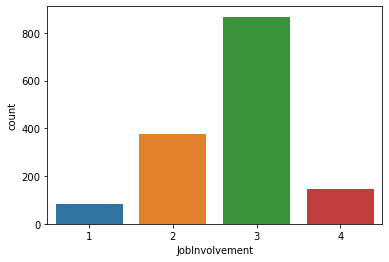

In [28]:
sns.countplot(df["JobInvolvement"])

most of the employees have level 3 job involvement, it can be abbreviated that the company is highly focusing on job involvement of the employees for better retention

<AxesSubplot:xlabel='JobRole', ylabel='count'>

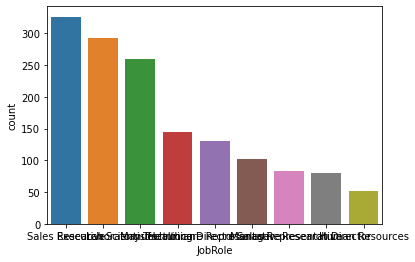

In [58]:
sns.countplot(df["JobRole"])

employees belonging to the sales job role have the highest count and the least count is for human resources

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

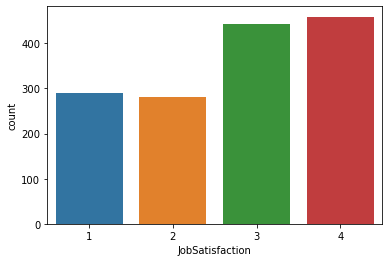

In [30]:
sns.countplot(df["JobSatisfaction"])

most of the employees in IBM are highly satisfied with their jobs, which can result in low attrition

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

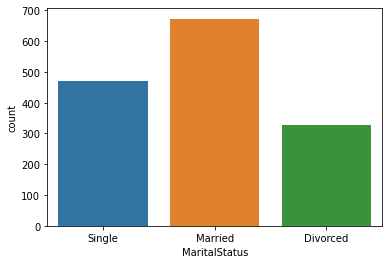

In [31]:
sns.countplot(df["MaritalStatus"])

more than 700 employees in IBM are married and the least number of employees count for divorced. 

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

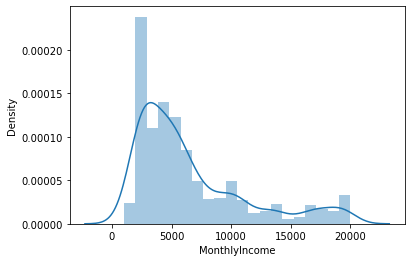

In [56]:
sns.distplot(df["MonthlyIncome"])

majority of the employees in IBM have monthly income of less than 7500 and least have above that range

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

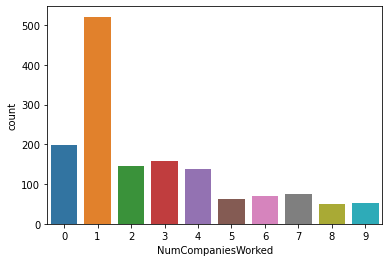

In [34]:
sns.countplot(df["NumCompaniesWorked"])

in IBM maximum of the working employees, have worked in 1 company only and least have worked in 8 to 9 companies

<AxesSubplot:xlabel='Over18', ylabel='count'>

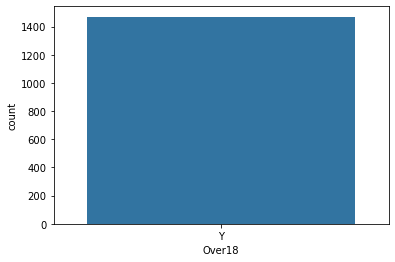

In [35]:
sns.countplot(df["Over18"])

<AxesSubplot:xlabel='OverTime', ylabel='count'>

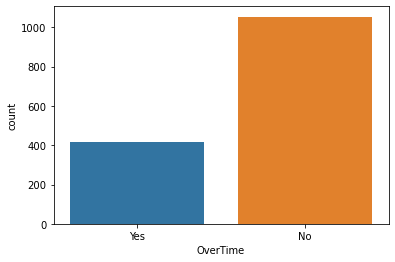

In [36]:
sns.countplot(df["OverTime"])

majority of the employees are reluctant to work overtime, this suggests that they hight stress levels and they are happy with their income

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

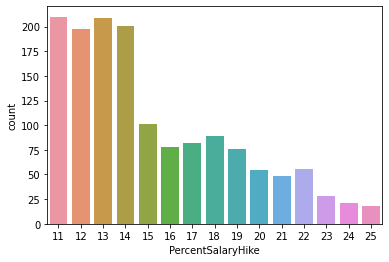

In [37]:
sns.countplot(df["PercentSalaryHike"])

the salary hike gradually decraeses. it can suggest that the freshers are expected to have greater salary hike

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

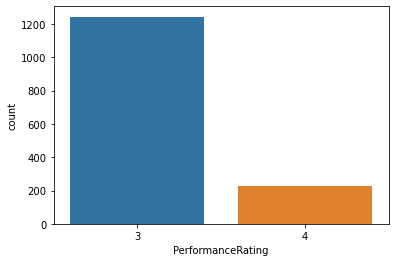

In [38]:
sns.countplot(df["PerformanceRating"])

majority of the employees have  a performnace rating 3, this means the company is working on their development 

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

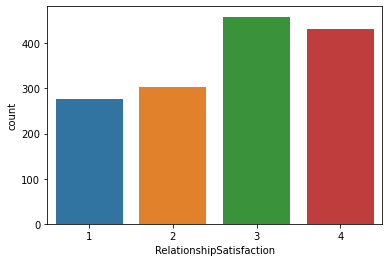

In [39]:
sns.countplot(df["RelationshipSatisfaction"])

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

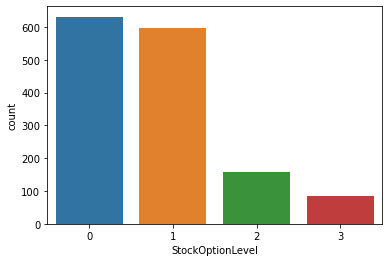

In [40]:
sns.countplot(df["StockOptionLevel"])

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

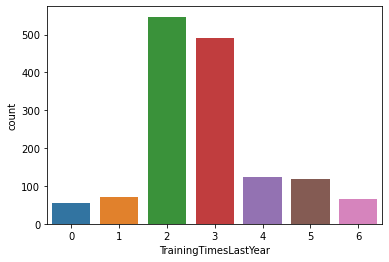

In [60]:
sns.countplot(df["TrainingTimesLastYear"])

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

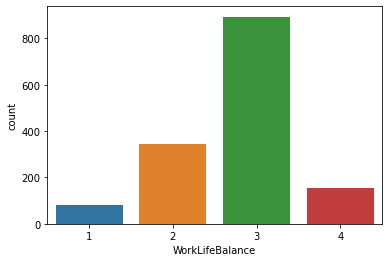

In [43]:
sns.countplot(df["WorkLifeBalance"])

more than 800 employees suggest that they have a good work life balance, while few like 150 suggests great balance and rest are against the opinion. 

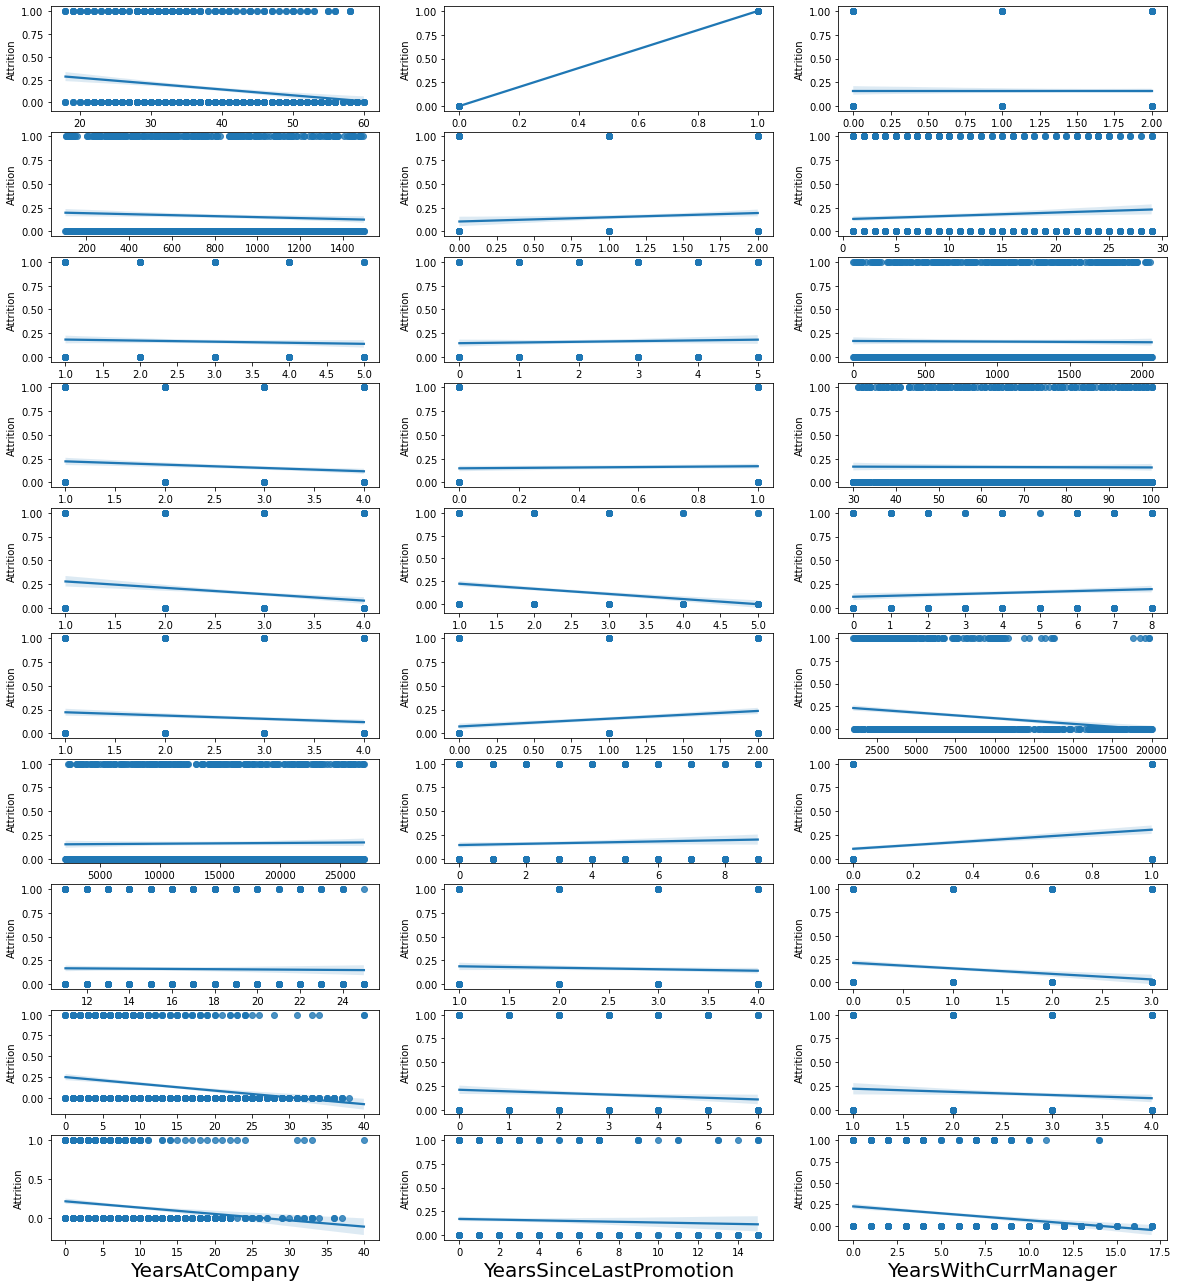

In [91]:
plt.figure(figsize=(20,25))
plotnumber =1

for column in df:
    if plotnumber <= 31:
        ax = plt.subplot(11,3,plotnumber)
        sns.regplot(x=df[column],y=df["Attrition"])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

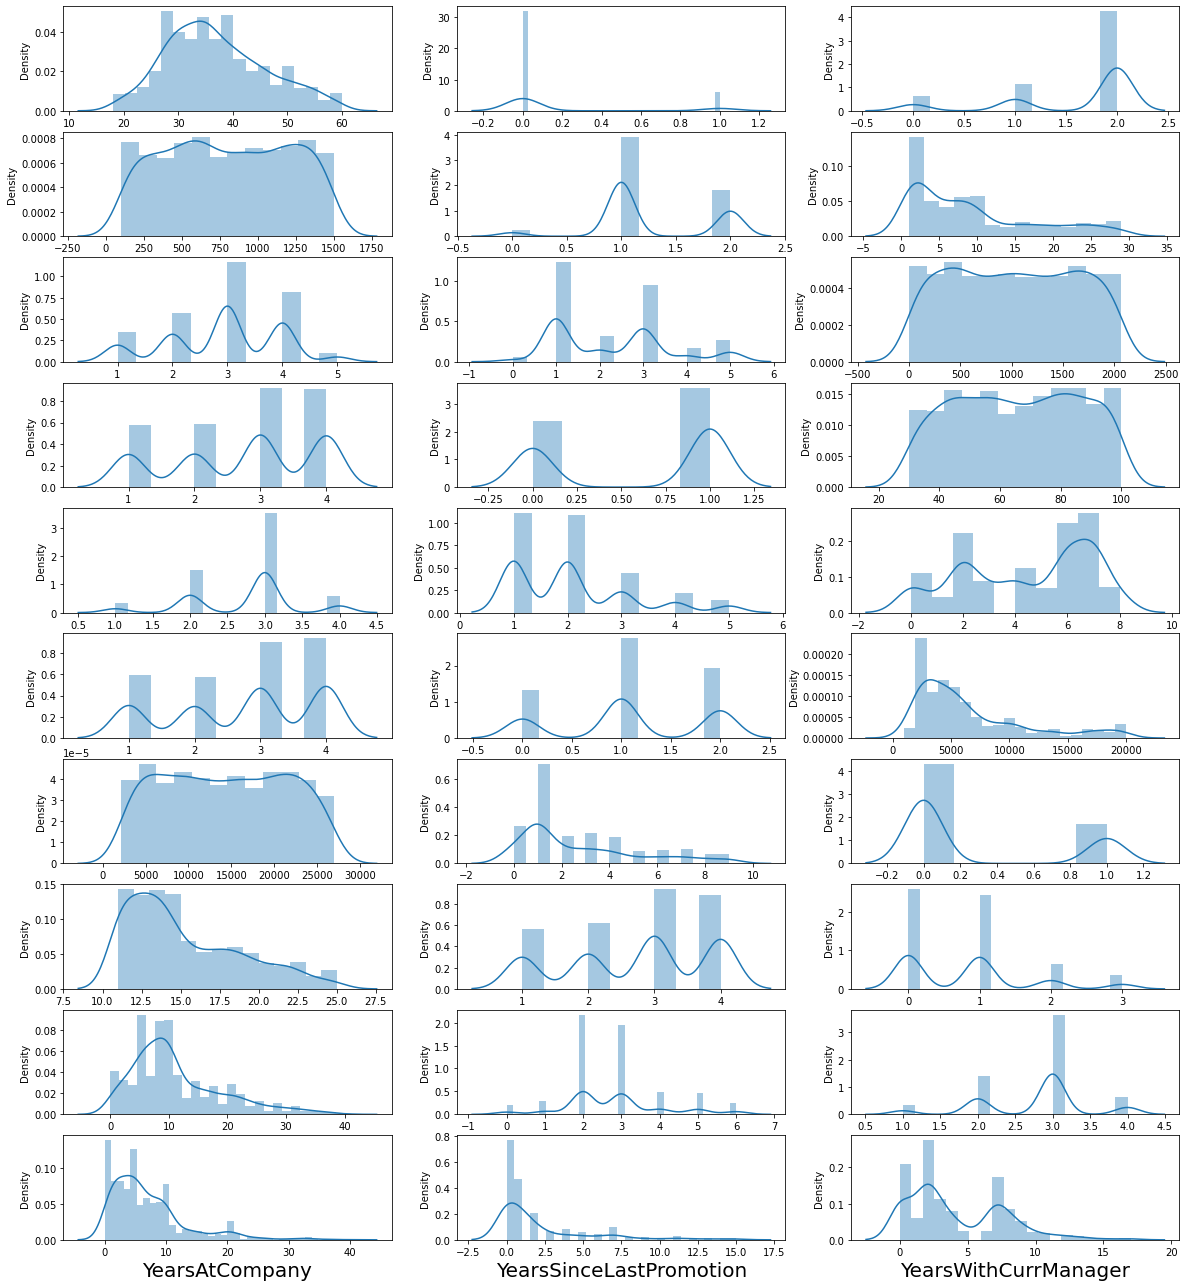

In [89]:
plt.figure(figsize=(20,25))
plotnumber =1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(11,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# label encoding 

In [61]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


label encodng can be applied to encode columns like businesstravel, department, attrition and education field

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
l=["Attrition","BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime","Over18"]
for i in l:
    df[i]=le.fit_transform(df[i])

In [9]:
df.sample(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
110,51,0,1,1456,1,1,4,3,1,145,...,3,80,0,23,1,2,13,12,12,8
808,29,0,2,1107,1,28,4,1,1,1120,...,1,80,1,11,1,3,7,5,1,7
135,36,0,2,216,1,6,2,3,1,178,...,4,80,2,7,0,3,3,2,0,1


In [10]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

it can be seen that all the object type has been converted to numeric or inetger type 

# descriptive statistics

In [69]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


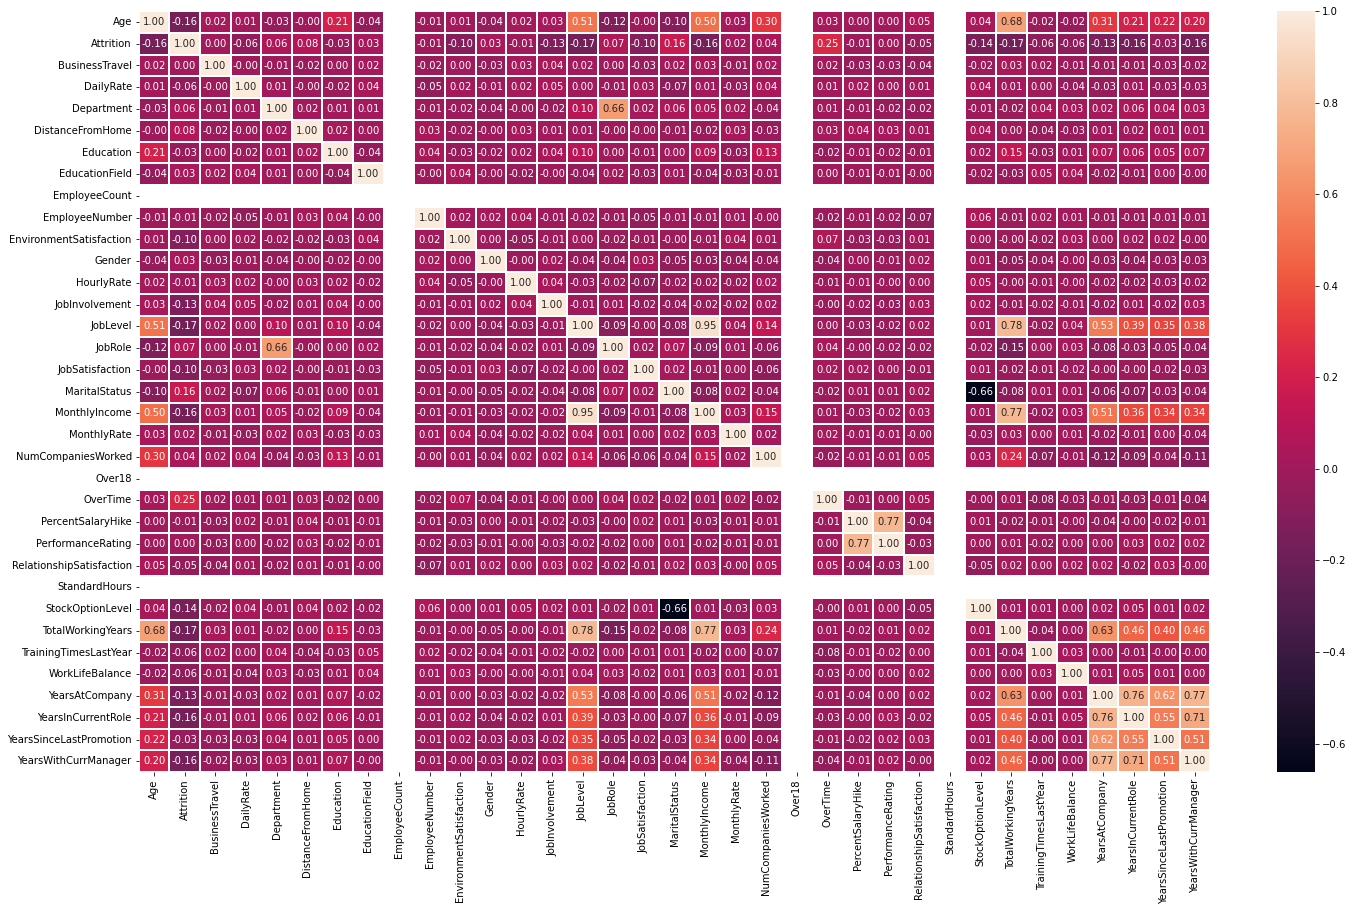

In [75]:
plt.figure(figsize=(24,14))
sns.heatmap(df.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

from the correlation we can see that employee count, over 18 and stnadard hours can be dropped

In [11]:
df.drop(["EmployeeCount","Over18","StandardHours"],axis=1,inplace=True)

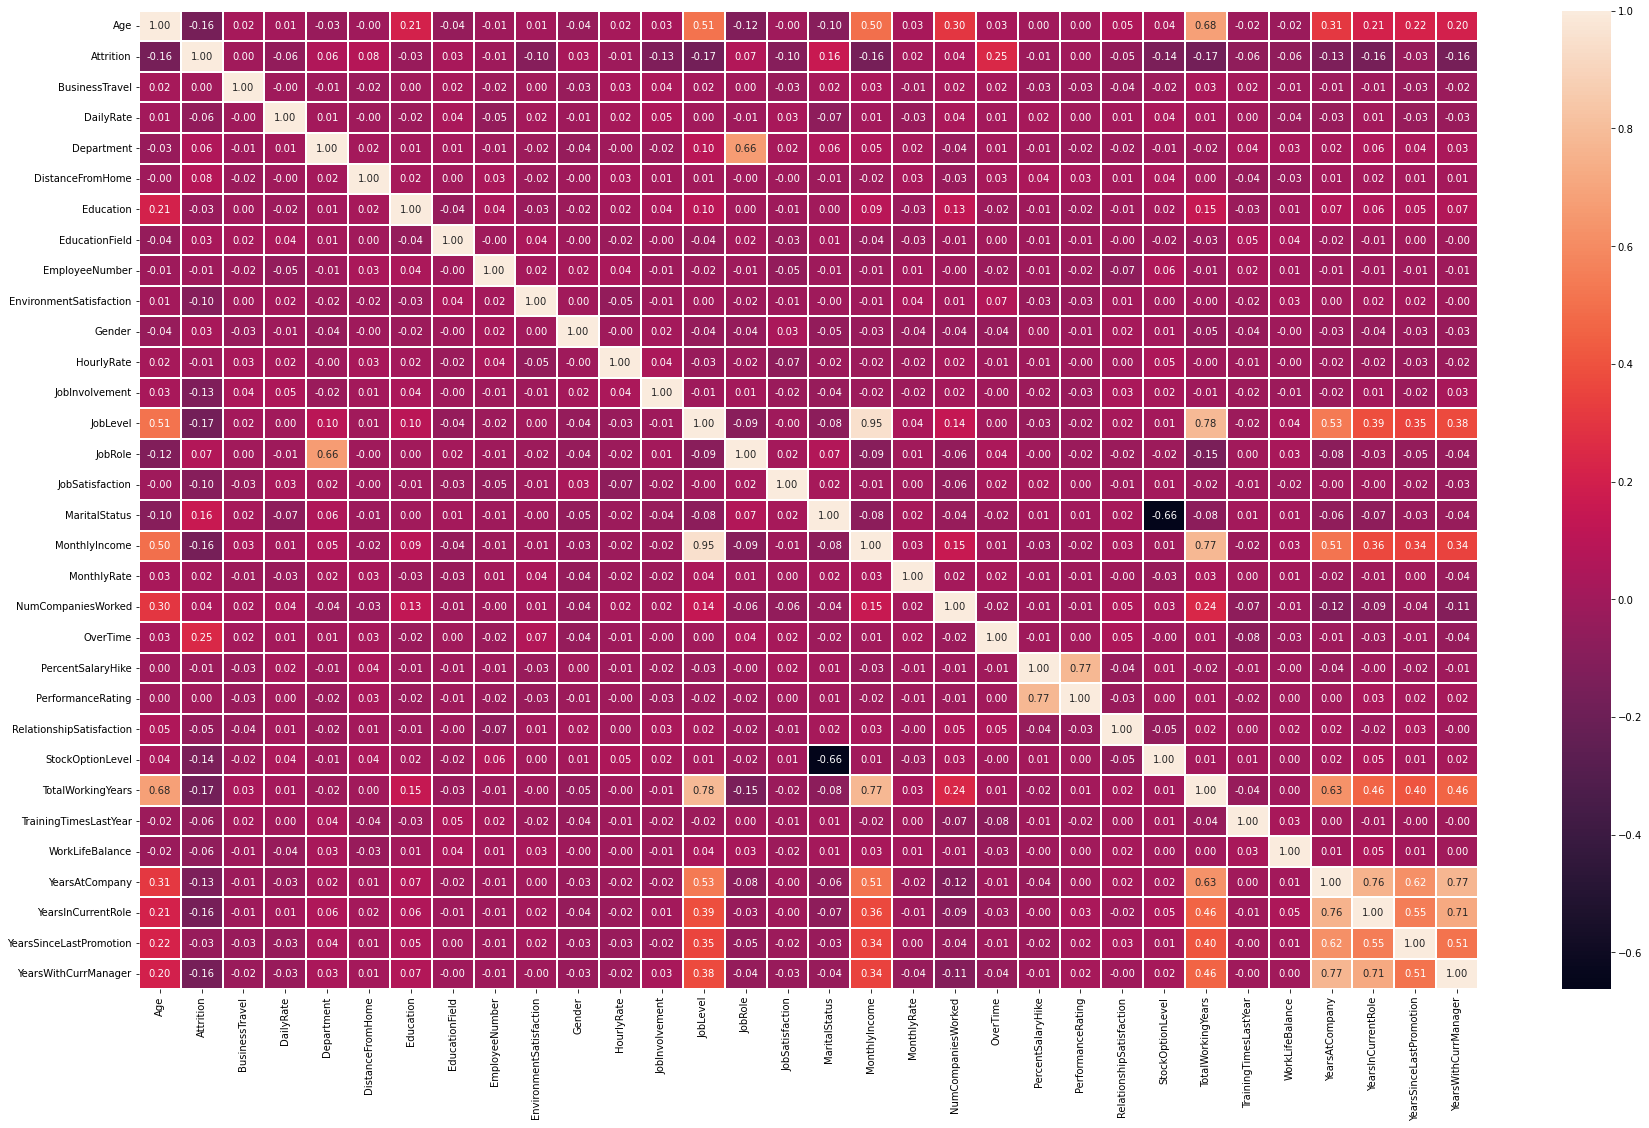

In [12]:
plt.figure(figsize=(30,18))
sns.heatmap(df.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

In [13]:
df.corr()["Attrition"].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
J

there are few columns that have strong correlation like:
   PerformanceRating  and  PercentSalaryHike are 77 % correlated
   years at company and years at current role are 76 % correlated 
we will drop performance rating and yearsincurrentrole column

In [14]:
df.drop(["PerformanceRating","YearsInCurrentRole"],axis=1,inplace=True)

# removal of outliers


In [81]:
df.shape

(1470, 30)

Age                            AxesSubplot(0.125,0.749828;0.110714x0.130172)
Attrition                   AxesSubplot(0.257857,0.749828;0.110714x0.130172)
BusinessTravel              AxesSubplot(0.390714,0.749828;0.110714x0.130172)
DailyRate                   AxesSubplot(0.523571,0.749828;0.110714x0.130172)
Department                  AxesSubplot(0.656429,0.749828;0.110714x0.130172)
DistanceFromHome            AxesSubplot(0.789286,0.749828;0.110714x0.130172)
Education                      AxesSubplot(0.125,0.593621;0.110714x0.130172)
EducationField              AxesSubplot(0.257857,0.593621;0.110714x0.130172)
EmployeeNumber              AxesSubplot(0.390714,0.593621;0.110714x0.130172)
EnvironmentSatisfaction     AxesSubplot(0.523571,0.593621;0.110714x0.130172)
Gender                      AxesSubplot(0.656429,0.593621;0.110714x0.130172)
HourlyRate                  AxesSubplot(0.789286,0.593621;0.110714x0.130172)
JobInvolvement                 AxesSubplot(0.125,0.437414;0.110714x0.130172)

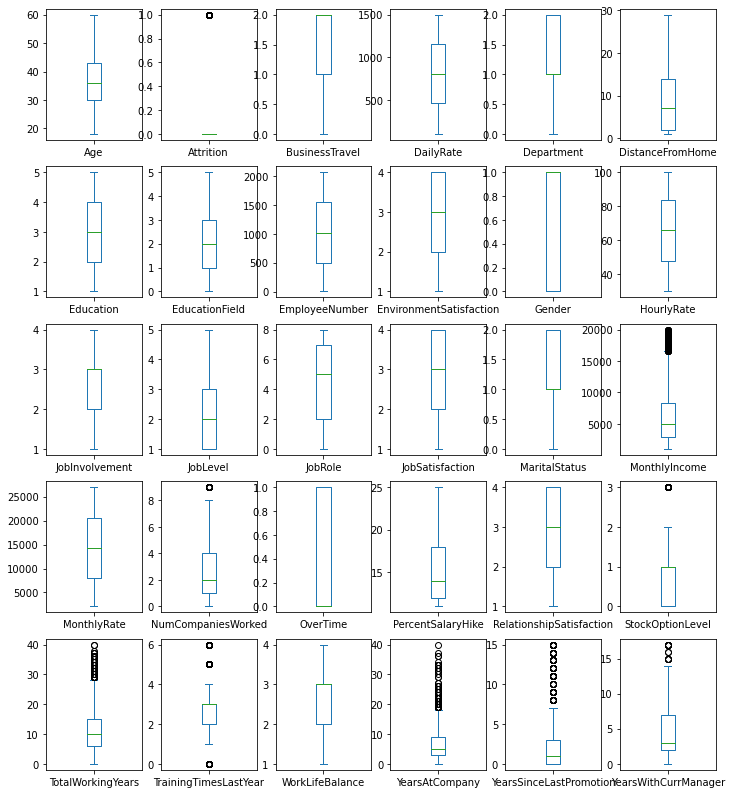

In [83]:
df.plot(kind='box',subplots=True,layout=(5,6),figsize=(12,14))

observation: from the boxplot, we can see that some outliers are present in some columns
    

In [15]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [16]:
np.where(z>3)

(array([  28,   45,   62,   62,   64,   85,   98,   98,  110,  123,  123,
         126,  126,  126,  153,  178,  187,  187,  190,  218,  231,  237,
         237,  270,  270,  326,  386,  386,  401,  411,  425,  425,  427,
         445,  473,  477,  535,  561,  561,  584,  592,  595,  595,  595,
         616,  624,  635,  653,  653,  677,  686,  701,  749,  752,  799,
         838,  861,  861,  875,  875,  894,  914,  914,  918,  922,  926,
         926,  937,  956,  962,  976, 1008, 1043, 1078, 1078, 1086, 1086,
        1093, 1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223,
        1242, 1295, 1301, 1301, 1303, 1331, 1348, 1401, 1414], dtype=int64),
 array([29, 28, 27, 28, 28, 24, 24, 27, 28, 28, 29, 24, 27, 28, 29, 28, 24,
        29, 27, 28, 29, 27, 28, 24, 27, 28, 28, 29, 24, 27, 27, 28, 28, 24,
        27, 27, 28, 27, 29, 28, 27, 24, 27, 28, 29, 24, 29, 27, 28, 27, 29,
        28, 27, 28, 28, 28, 27, 28, 28, 29, 24, 27, 28, 27, 28, 28, 29, 28,
        24, 27, 28, 28, 24,

In [17]:
dfn=df[(z<3).all(axis=1)]

In [18]:
dfn.shape

(1396, 30)

percent loss of data=(1470-1396)/1470*100=5%

# skewness removal

In [19]:
dfn.skew().sort_values()

BusinessTravel             -1.425472
WorkLifeBalance            -0.556652
JobInvolvement             -0.509139
Gender                     -0.406858
JobRole                    -0.390168
JobSatisfaction            -0.345527
EnvironmentSatisfaction    -0.315979
RelationshipSatisfaction   -0.290901
Education                  -0.287985
MaritalStatus              -0.156633
HourlyRate                 -0.030553
DailyRate                  -0.016078
EmployeeNumber              0.018467
MonthlyRate                 0.032477
Department                  0.183475
Age                         0.465533
EducationField              0.544560
TrainingTimesLastYear       0.578637
YearsWithCurrManager        0.680904
PercentSalaryHike           0.800660
DistanceFromHome            0.954545
StockOptionLevel            0.957525
OverTime                    0.964771
TotalWorkingYears           1.013725
NumCompaniesWorked          1.035919
JobLevel                    1.114363
YearsAtCompany              1.252927
M

the skewness needs to be adjusted for some of the columns

In [20]:
list=["BusinessTravel","OverTime","TotalWorkingYears","NumCompaniesWorked","JobLevel","YearsAtCompany","MonthlyIncome","YearsSinceLastPromotion"]
for i in list:
    dfn[i]=np.log1p(dfn[i])

In [94]:
dfn.skew().sort_values()

BusinessTravel             -1.801164
TotalWorkingYears          -0.725349
WorkLifeBalance            -0.556652
JobInvolvement             -0.509139
Gender                     -0.406858
JobRole                    -0.390168
YearsAtCompany             -0.364838
JobSatisfaction            -0.345527
EnvironmentSatisfaction    -0.315979
RelationshipSatisfaction   -0.290901
Education                  -0.287985
MaritalStatus              -0.156633
HourlyRate                 -0.030553
DailyRate                  -0.016078
EmployeeNumber              0.018467
MonthlyRate                 0.032477
NumCompaniesWorked          0.098689
Department                  0.183475
MonthlyIncome               0.317588
Age                         0.465533
JobLevel                    0.491805
EducationField              0.544560
TrainingTimesLastYear       0.578637
YearsWithCurrManager        0.680904
YearsSinceLastPromotion     0.688427
PercentSalaryHike           0.800660
DistanceFromHome            0.954545
S

it can be seen that the skewness of the columns have been reduced and it is in range of +/-0.85

# Scaling of the data

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [22]:
df.sample()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
726,31,0,1,853,1,1,1,1,1011,3,...,0,12,3,1,4,1,3,4,0,3


In [23]:
x=dfn.drop(["Attrition"],axis=1)
y=dfn["Attrition"]

In [24]:
dfx=sc.fit_transform(x)

In [25]:
dfx.mean()

-6.230675605049787e-17

# splitting of train and test data

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [28]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((accuracy_score(y_test,pred_test))>maxacc):
            maxacc=accuracy_score(y_test,pred_test)
            rs=i
        print(f"at random state {i},  accuracy score is {accuracy_score(y_train,pred_train)}")
        print(f"at random state {i}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
        print(f"at random state {i}, classification report is {classification_report(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)
   

## KNeighbors classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
model_selection(knn)

at random state 0,  accuracy score is 0.8628454452405322
at random state 0, confusion matrix is [[353   4]
 [ 55   7]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.87      0.99      0.92       357
           1       0.64      0.11      0.19        62

    accuracy                           0.86       419
   macro avg       0.75      0.55      0.56       419
weighted avg       0.83      0.86      0.81       419



at random state 1,  accuracy score is 0.8628454452405322
at random state 1, confusion matrix is [[357   4]
 [ 52   6]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.87      0.99      0.93       361
           1       0.60      0.10      0.18        58

    accuracy                           0.87       419
   macro avg       0.74      0.55      0.55       419
weighted avg       0.84      0.87      0.82       419



at random state 

at random state 17,  accuracy score is 0.8771750255885363
at random state 17, confusion matrix is [[344   2]
 [ 62  11]]
at random state 17, classification report is               precision    recall  f1-score   support

           0       0.85      0.99      0.91       346
           1       0.85      0.15      0.26        73

    accuracy                           0.85       419
   macro avg       0.85      0.57      0.59       419
weighted avg       0.85      0.85      0.80       419



at random state 18,  accuracy score is 0.8648925281473899
at random state 18, confusion matrix is [[347   6]
 [ 57   9]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.86      0.98      0.92       353
           1       0.60      0.14      0.22        66

    accuracy                           0.85       419
   macro avg       0.73      0.56      0.57       419
weighted avg       0.82      0.85      0.81       419



at random 

at random state 34, confusion matrix is [[358   5]
 [ 47   9]]
at random state 34, classification report is               precision    recall  f1-score   support

           0       0.88      0.99      0.93       363
           1       0.64      0.16      0.26        56

    accuracy                           0.88       419
   macro avg       0.76      0.57      0.59       419
weighted avg       0.85      0.88      0.84       419



at random state 35,  accuracy score is 0.8700102354145343
at random state 35, confusion matrix is [[349   7]
 [ 54   9]]
at random state 35, classification report is               precision    recall  f1-score   support

           0       0.87      0.98      0.92       356
           1       0.56      0.14      0.23        63

    accuracy                           0.85       419
   macro avg       0.71      0.56      0.57       419
weighted avg       0.82      0.85      0.82       419



at random state 36,  accuracy score is 0.8689866939611054
at random 

at random state 51, confusion matrix is [[350   4]
 [ 56   9]]
at random state 51, classification report is               precision    recall  f1-score   support

           0       0.86      0.99      0.92       354
           1       0.69      0.14      0.23        65

    accuracy                           0.86       419
   macro avg       0.78      0.56      0.58       419
weighted avg       0.84      0.86      0.81       419



at random state 52,  accuracy score is 0.8648925281473899
at random state 52, confusion matrix is [[342   7]
 [ 60  10]]
at random state 52, classification report is               precision    recall  f1-score   support

           0       0.85      0.98      0.91       349
           1       0.59      0.14      0.23        70

    accuracy                           0.84       419
   macro avg       0.72      0.56      0.57       419
weighted avg       0.81      0.84      0.80       419



at random state 53,  accuracy score is 0.8659160696008188
at random 

at random state 68,  accuracy score is 0.8689866939611054
at random state 68, confusion matrix is [[348   4]
 [ 56  11]]
at random state 68, classification report is               precision    recall  f1-score   support

           0       0.86      0.99      0.92       352
           1       0.73      0.16      0.27        67

    accuracy                           0.86       419
   macro avg       0.80      0.58      0.59       419
weighted avg       0.84      0.86      0.82       419



at random state 69,  accuracy score is 0.8648925281473899
at random state 69, confusion matrix is [[345   4]
 [ 59  11]]
at random state 69, classification report is               precision    recall  f1-score   support

           0       0.85      0.99      0.92       349
           1       0.73      0.16      0.26        70

    accuracy                           0.85       419
   macro avg       0.79      0.57      0.59       419
weighted avg       0.83      0.85      0.81       419



at random 

at random state 85, confusion matrix is [[354   1]
 [ 58   6]]
at random state 85, classification report is               precision    recall  f1-score   support

           0       0.86      1.00      0.92       355
           1       0.86      0.09      0.17        64

    accuracy                           0.86       419
   macro avg       0.86      0.55      0.55       419
weighted avg       0.86      0.86      0.81       419



at random state 86,  accuracy score is 0.8628454452405322
at random state 86, confusion matrix is [[346   7]
 [ 59   7]]
at random state 86, classification report is               precision    recall  f1-score   support

           0       0.85      0.98      0.91       353
           1       0.50      0.11      0.17        66

    accuracy                           0.84       419
   macro avg       0.68      0.54      0.54       419
weighted avg       0.80      0.84      0.80       419



at random state 87,  accuracy score is 0.8781985670419652
at random 

CV score

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
score=cross_val_score(knn,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.83571429 0.83512545 0.83512545 0.85663082 0.86021505]
0.8445622119815669
0.011375884035394551


## decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model_selection(dtc)

CV score

In [115]:
score=cross_val_score(dtc,dfx,y,cv=4)
print(score)
print(score.mean())
print(score.std())

[0.75071633 0.80229226 0.78796562 0.7765043 ]
0.7793696275071633
0.018898146072024204


## SVC

In [111]:
from sklearn.svm import SVC
svc=SVC()
model_selection(svc)

at random state 0,  accuracy score is 0.9293756397134084
at random state 0, confusion matrix is [[356   1]
 [ 46  16]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.89      1.00      0.94       357
           1       0.94      0.26      0.41        62

    accuracy                           0.89       419
   macro avg       0.91      0.63      0.67       419
weighted avg       0.89      0.89      0.86       419



at random state 1,  accuracy score is 0.9242579324462641
at random state 1, confusion matrix is [[356   5]
 [ 45  13]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.89      0.99      0.93       361
           1       0.72      0.22      0.34        58

    accuracy                           0.88       419
   macro avg       0.81      0.61      0.64       419
weighted avg       0.86      0.88      0.85       419



at random state 

at random state 18,  accuracy score is 0.9181166837256909
at random state 18, confusion matrix is [[349   4]
 [ 49  17]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.88      0.99      0.93       353
           1       0.81      0.26      0.39        66

    accuracy                           0.87       419
   macro avg       0.84      0.62      0.66       419
weighted avg       0.87      0.87      0.84       419



at random state 19,  accuracy score is 0.9242579324462641
at random state 19, confusion matrix is [[351   1]
 [ 52  15]]
at random state 19, classification report is               precision    recall  f1-score   support

           0       0.87      1.00      0.93       352
           1       0.94      0.22      0.36        67

    accuracy                           0.87       419
   macro avg       0.90      0.61      0.65       419
weighted avg       0.88      0.87      0.84       419



at random 

at random state 36,  accuracy score is 0.9232343909928352
at random state 36, confusion matrix is [[348   6]
 [ 53  12]]
at random state 36, classification report is               precision    recall  f1-score   support

           0       0.87      0.98      0.92       354
           1       0.67      0.18      0.29        65

    accuracy                           0.86       419
   macro avg       0.77      0.58      0.61       419
weighted avg       0.84      0.86      0.82       419



at random state 37,  accuracy score is 0.9201637666325486
at random state 37, confusion matrix is [[343   2]
 [ 60  14]]
at random state 37, classification report is               precision    recall  f1-score   support

           0       0.85      0.99      0.92       345
           1       0.88      0.19      0.31        74

    accuracy                           0.85       419
   macro avg       0.86      0.59      0.61       419
weighted avg       0.86      0.85      0.81       419



at random 

at random state 54,  accuracy score is 0.925281473899693
at random state 54, confusion matrix is [[340   5]
 [ 60  14]]
at random state 54, classification report is               precision    recall  f1-score   support

           0       0.85      0.99      0.91       345
           1       0.74      0.19      0.30        74

    accuracy                           0.84       419
   macro avg       0.79      0.59      0.61       419
weighted avg       0.83      0.84      0.80       419



at random state 55,  accuracy score is 0.9191402251791198
at random state 55, confusion matrix is [[360   2]
 [ 47  10]]
at random state 55, classification report is               precision    recall  f1-score   support

           0       0.88      0.99      0.94       362
           1       0.83      0.18      0.29        57

    accuracy                           0.88       419
   macro avg       0.86      0.58      0.61       419
weighted avg       0.88      0.88      0.85       419



at random s

at random state 72,  accuracy score is 0.9232343909928352
at random state 72, confusion matrix is [[341   5]
 [ 56  17]]
at random state 72, classification report is               precision    recall  f1-score   support

           0       0.86      0.99      0.92       346
           1       0.77      0.23      0.36        73

    accuracy                           0.85       419
   macro avg       0.82      0.61      0.64       419
weighted avg       0.84      0.85      0.82       419



at random state 73,  accuracy score is 0.9211873080859775
at random state 73, confusion matrix is [[333   4]
 [ 68  14]]
at random state 73, classification report is               precision    recall  f1-score   support

           0       0.83      0.99      0.90       337
           1       0.78      0.17      0.28        82

    accuracy                           0.83       419
   macro avg       0.80      0.58      0.59       419
weighted avg       0.82      0.83      0.78       419



at random 

at random state 90,  accuracy score is 0.9273285568065507
at random state 90, confusion matrix is [[342  10]
 [ 53  14]]
at random state 90, classification report is               precision    recall  f1-score   support

           0       0.87      0.97      0.92       352
           1       0.58      0.21      0.31        67

    accuracy                           0.85       419
   macro avg       0.72      0.59      0.61       419
weighted avg       0.82      0.85      0.82       419



at random state 91,  accuracy score is 0.9211873080859775
at random state 91, confusion matrix is [[343   7]
 [ 51  18]]
at random state 91, classification report is               precision    recall  f1-score   support

           0       0.87      0.98      0.92       350
           1       0.72      0.26      0.38        69

    accuracy                           0.86       419
   macro avg       0.80      0.62      0.65       419
weighted avg       0.85      0.86      0.83       419



at random 

CV score

In [116]:
score=cross_val_score(svc,dfx,y,cv=4)
print(score)
print(score.mean())
print(score.std())

[0.86246418 0.86246418 0.85100287 0.86532951]
0.8603151862464183
0.005502253401052048


## random forest classifier

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rf=RandomForestClassifier()
model_selection(rf)

at random state 0,  accuracy score is 1.0
at random state 0, confusion matrix is [[355   2]
 [ 51  11]]
at random state 0, classification report is               precision    recall  f1-score   support

           0       0.87      0.99      0.93       357
           1       0.85      0.18      0.29        62

    accuracy                           0.87       419
   macro avg       0.86      0.59      0.61       419
weighted avg       0.87      0.87      0.84       419



at random state 1,  accuracy score is 1.0
at random state 1, confusion matrix is [[360   1]
 [ 48  10]]
at random state 1, classification report is               precision    recall  f1-score   support

           0       0.88      1.00      0.94       361
           1       0.91      0.17      0.29        58

    accuracy                           0.88       419
   macro avg       0.90      0.58      0.61       419
weighted avg       0.89      0.88      0.85       419



at random state 2,  accuracy score is 1.0
at r

at random state 18,  accuracy score is 1.0
at random state 18, confusion matrix is [[345   8]
 [ 54  12]]
at random state 18, classification report is               precision    recall  f1-score   support

           0       0.86      0.98      0.92       353
           1       0.60      0.18      0.28        66

    accuracy                           0.85       419
   macro avg       0.73      0.58      0.60       419
weighted avg       0.82      0.85      0.82       419



at random state 19,  accuracy score is 1.0
at random state 19, confusion matrix is [[351   1]
 [ 56  11]]
at random state 19, classification report is               precision    recall  f1-score   support

           0       0.86      1.00      0.92       352
           1       0.92      0.16      0.28        67

    accuracy                           0.86       419
   macro avg       0.89      0.58      0.60       419
weighted avg       0.87      0.86      0.82       419



at random state 20,  accuracy score is 1

at random state 36,  accuracy score is 1.0
at random state 36, confusion matrix is [[349   5]
 [ 56   9]]
at random state 36, classification report is               precision    recall  f1-score   support

           0       0.86      0.99      0.92       354
           1       0.64      0.14      0.23        65

    accuracy                           0.85       419
   macro avg       0.75      0.56      0.57       419
weighted avg       0.83      0.85      0.81       419



at random state 37,  accuracy score is 1.0
at random state 37, confusion matrix is [[344   1]
 [ 66   8]]
at random state 37, classification report is               precision    recall  f1-score   support

           0       0.84      1.00      0.91       345
           1       0.89      0.11      0.19        74

    accuracy                           0.84       419
   macro avg       0.86      0.55      0.55       419
weighted avg       0.85      0.84      0.78       419



at random state 38,  accuracy score is 1

at random state 54,  accuracy score is 1.0
at random state 54, confusion matrix is [[341   4]
 [ 63  11]]
at random state 54, classification report is               precision    recall  f1-score   support

           0       0.84      0.99      0.91       345
           1       0.73      0.15      0.25        74

    accuracy                           0.84       419
   macro avg       0.79      0.57      0.58       419
weighted avg       0.82      0.84      0.79       419



at random state 55,  accuracy score is 1.0
at random state 55, confusion matrix is [[361   1]
 [ 50   7]]
at random state 55, classification report is               precision    recall  f1-score   support

           0       0.88      1.00      0.93       362
           1       0.88      0.12      0.22        57

    accuracy                           0.88       419
   macro avg       0.88      0.56      0.57       419
weighted avg       0.88      0.88      0.84       419



at random state 56,  accuracy score is 1

at random state 72,  accuracy score is 1.0
at random state 72, confusion matrix is [[341   5]
 [ 61  12]]
at random state 72, classification report is               precision    recall  f1-score   support

           0       0.85      0.99      0.91       346
           1       0.71      0.16      0.27        73

    accuracy                           0.84       419
   macro avg       0.78      0.57      0.59       419
weighted avg       0.82      0.84      0.80       419



at random state 73,  accuracy score is 1.0
at random state 73, confusion matrix is [[336   1]
 [ 75   7]]
at random state 73, classification report is               precision    recall  f1-score   support

           0       0.82      1.00      0.90       337
           1       0.88      0.09      0.16        82

    accuracy                           0.82       419
   macro avg       0.85      0.54      0.53       419
weighted avg       0.83      0.82      0.75       419



at random state 74,  accuracy score is 1

at random state 90,  accuracy score is 1.0
at random state 90, confusion matrix is [[342  10]
 [ 54  13]]
at random state 90, classification report is               precision    recall  f1-score   support

           0       0.86      0.97      0.91       352
           1       0.57      0.19      0.29        67

    accuracy                           0.85       419
   macro avg       0.71      0.58      0.60       419
weighted avg       0.82      0.85      0.81       419



at random state 91,  accuracy score is 1.0
at random state 91, confusion matrix is [[344   6]
 [ 58  11]]
at random state 91, classification report is               precision    recall  f1-score   support

           0       0.86      0.98      0.91       350
           1       0.65      0.16      0.26        69

    accuracy                           0.85       419
   macro avg       0.75      0.57      0.59       419
weighted avg       0.82      0.85      0.81       419



at random state 92,  accuracy score is 1

CV score

In [125]:
score=cross_val_score(svc,dfx,y,cv=4)
print(score)
print(score.mean())
print(score.std())

[0.86246418 0.86246418 0.85100287 0.86532951]
0.8603151862464183
0.005502253401052048


We will be selecting the KNeighbors classifier algorithm for building the model for prediction of attrition since in this model, there is minimum difference between the accuracy score and the CV score and additionally and false negative and false positive value is minimum

# Hyper parameter tuning

In [128]:
from sklearn.model_selection import GridSearchCV

In [137]:
dict={"n_neighbors":[7,8,9],
      "weights":['uniform', 'distance'],
      "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
      "leaf_size":[30,40,50]}
     

In [138]:
gd=GridSearchCV(estimator=knn,param_grid=dict,cv=5)

In [139]:
gd.fit(dfx,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 50], 'n_neighbors': [7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [140]:
gd.best_params_

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 7, 'weights': 'uniform'}

In [141]:
gd.best_score_

0.8553072196620584

# Building the final model

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(algorithm='auto', leaf_size= 30, n_neighbors=7, weights= 'uniform')
instance=knn
x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=9,test_size=0.30)
instance.fit(x_train,y_train)
pred_train=instance.predict(x_train)
pred_test=instance.predict(x_test)
      
print(f"at random state {9},  accuracy score is {accuracy_score(y_train,pred_train)}")
print(f"at random state {9}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
print(f"at random state {9}, classification report is {classification_report(y_test,pred_test)}")
       

at random state 9,  accuracy score is 0.8638689866939611
at random state 9, confusion matrix is [[358   1]
 [ 51   9]]
at random state 9, classification report is               precision    recall  f1-score   support

           0       0.88      1.00      0.93       359
           1       0.90      0.15      0.26        60

    accuracy                           0.88       419
   macro avg       0.89      0.57      0.59       419
weighted avg       0.88      0.88      0.84       419



# ROC AUC plot

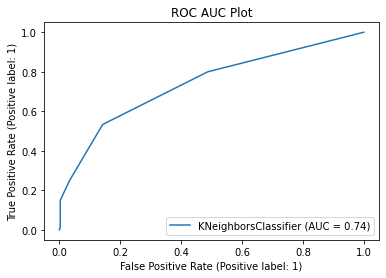

In [146]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

the accuracy is 86% and AUC is 74%

# Model saving

In [33]:
import pickle
filename="HR analytics.pkl"
pickle.dump(knn,open(filename,'wb'))

# Prediction

In [151]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred_test})

In [158]:
dfpred.sample(40)

,Expected,Predicted
1279,1,0
1375,1,0
404,0,0
669,1,0
1347,0,0
594,0,0
650,0,0
912,0,0
605,0,0
1422,0,0
